[*********************100%***********************]  1 of 1 completed


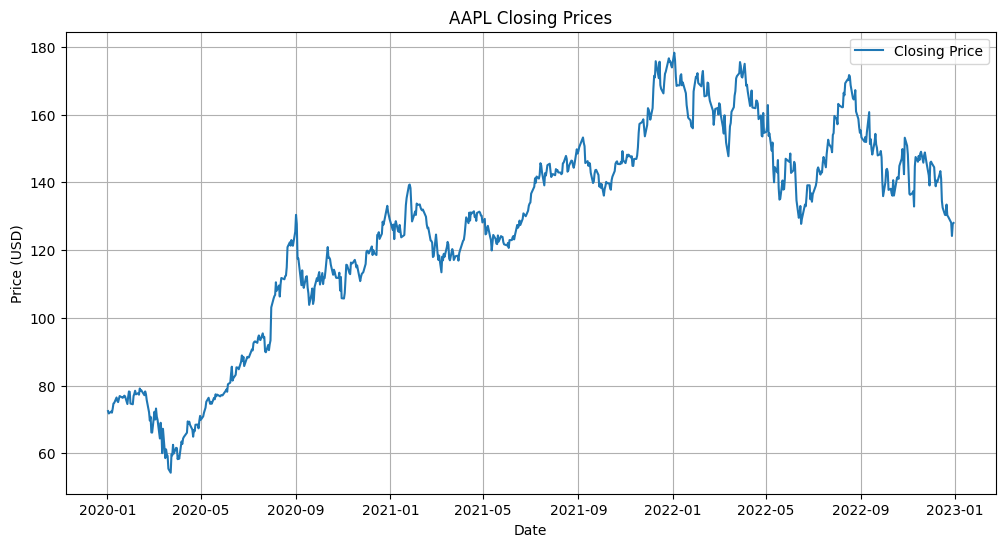

[*********************100%***********************]  1 of 1 completed


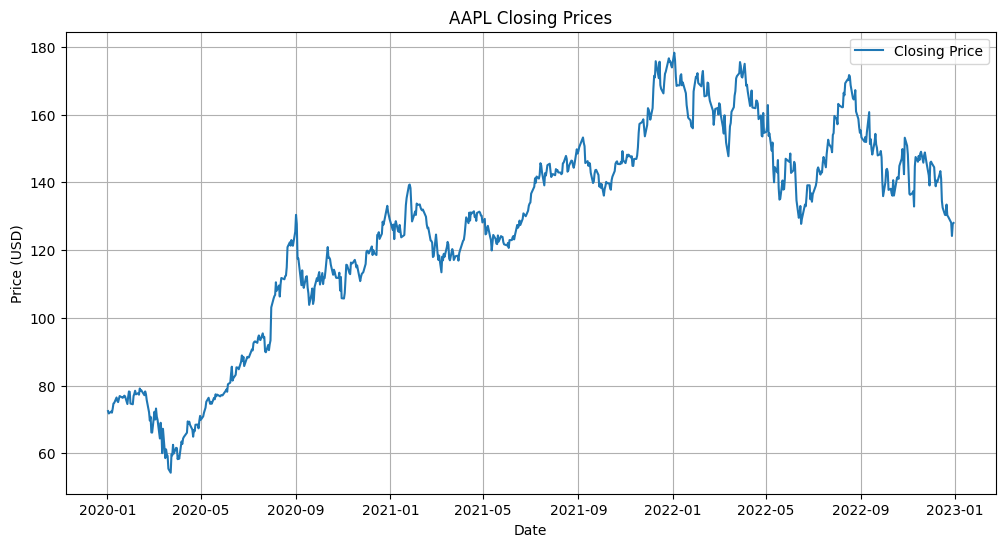

Price            Close        High         Low        Open     Volume  Signal  \
Date                                                                            
2020-01-03   71.763718   72.523746   71.539330   71.696160  146322800       0   
2020-01-06   72.335571   72.374177   70.634554   70.885487  118387200       0   
2020-01-07   71.995369   72.600975   71.775804   72.345220  108872000       0   
2020-01-08   73.153496   73.455095   71.698581   71.698581  132079200       0   
2020-01-09   74.707344   74.900365   73.879757   74.130683  170108400       0   
...                ...         ...         ...         ...        ...     ...   
2022-12-23  129.900284  130.451959  127.713276  128.974252   63814900       0   
2022-12-27  128.097488  129.456984  126.806960  129.427431   69007800       0   
2022-12-28  124.166794  129.082630  123.999322  127.742842   85438400       0   
2022-12-29  127.683746  128.540812  125.831689  126.087820   75703700       0   
2022-12-30  127.998955  128.

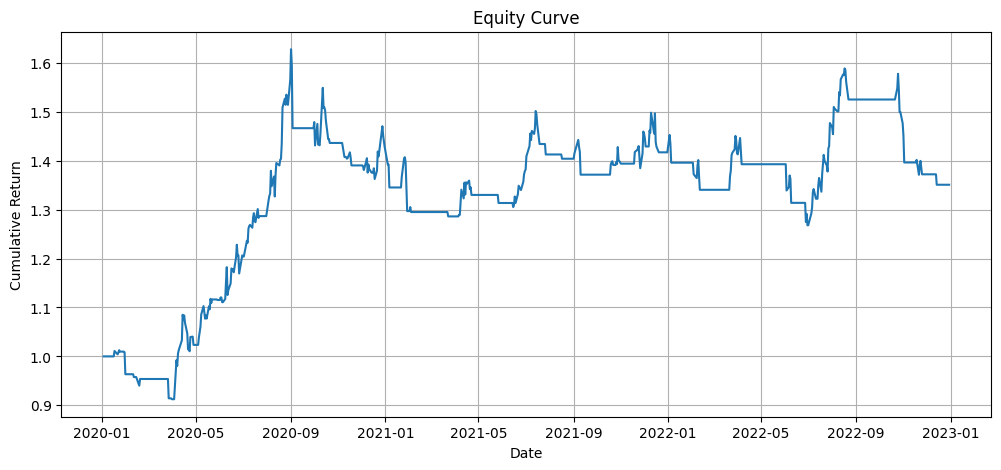

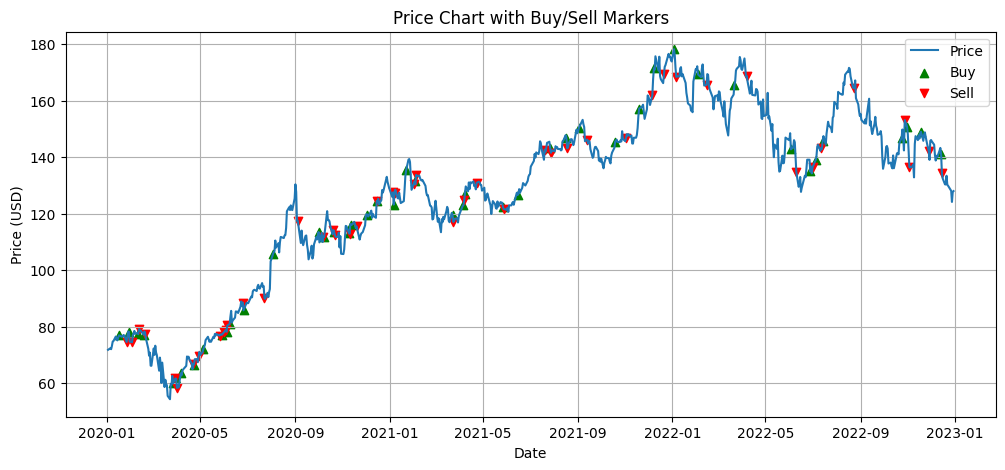

In [1]:
# Run the backtest and report the results

%run loading-price-data.ipynb
%run backtesting-framework.ipynb
%run ROC-threshold-strategy.ipynb

# Calculate total return 
daily_growth = results_roc['Strategy_Returns'] + 1
cumulative_growth = daily_growth.cumprod()
final_value = cumulative_growth.iloc[-1]
total_return = final_value - 1
print(f"Total return: {total_return:.2%}")

# Calculate number of trades 
position_changes = results_roc['Position'].diff()
is_trade = position_changes != 0
trades = is_trade.sum()
print(f"Number of trades: {trades}")

# Plot equity curve 
results_roc['Cumulative_Returns'] = (results_roc['Strategy_Returns'] + 1).cumprod()

plt.figure(figsize=(12, 5))  
plt.plot(results_roc['Cumulative_Returns'])  
plt.title('Equity Curve')  
plt.xlabel('Date')  
plt.ylabel('Cumulative Return')  
plt.grid()  
plt.show()  

# Plot price chart with buy/sell markers 
buy_signals = results_roc['Position'].diff() == 1       # (0 to 1)
sell_signals = results_roc['Position'].diff() == -1     # (1 to 0)

plt.figure(figsize=(12, 5))
plt.plot(results_roc['Close'], label='Price')
plt.scatter(results_roc[buy_signals].index, results_roc[buy_signals]['Close'], 
            marker='^', color='green',label='Buy')
plt.scatter(results_roc[sell_signals].index, results_roc[sell_signals]['Close'], 
            marker='v', color='red', label='Sell')
plt.title('Price Chart with Buy/Sell Markers')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

